In [2]:
import pandas as pd

politician_map = pd.read_csv('map.csv')
handles = politician_map['Handle']

party_colors = []
for party in politician_map['Party']:
    if party == 'Democratic Party':
        party_colors.append('b')
    elif party == 'Republican Party':
        party_colors.append('r')
    else:
        party_colors.append('k')

In [3]:
from preprocess import *

key_terms_str = []
for handle in handles:
    try:  
        handle_obj = Preprocess(handle)
        key_terms_str.append( ' '.join(handle_obj.n_key_terms) )
    except ValueError:
        continue

08/20/2019 10:37:28 AM | INFO | Processing Tweets from RepFinkenauer
08/20/2019 10:37:28 AM | INFO | Processing Tweets from RepSpanberger
08/20/2019 10:37:29 AM | INFO | Processing Tweets from RepKinzinger
08/20/2019 10:37:29 AM | INFO | Processing Tweets from RepAdamSchiff
08/20/2019 10:37:29 AM | INFO | Processing Tweets from RepAdrianSmith
08/20/2019 10:37:30 AM | INFO | Processing Tweets from RepEspaillat
08/20/2019 10:37:30 AM | INFO | Processing Tweets from RepAlGreen
08/20/2019 10:37:30 AM | INFO | Processing Tweets from RepLowenthal
08/20/2019 10:37:31 AM | INFO | Processing Tweets from RepSires
08/20/2019 10:37:31 AM | INFO | Processing Tweets from RepAOC
08/20/2019 10:37:31 AM | INFO | Processing Tweets from SenAmyKlobuchar
08/20/2019 10:37:31 AM | INFO | Processing Tweets from RepAndreCarson
08/20/2019 10:37:32 AM | INFO | Processing Tweets from RepAndyBarr
08/20/2019 10:37:32 AM | INFO | Processing Tweets from RepAndyLevin
08/20/2019 10:37:32 AM | INFO | Processing Tweets f

08/20/2019 10:38:07 AM | INFO | Processing Tweets from SenWarren
08/20/2019 10:38:07 AM | INFO | Processing Tweets from repcleaver
08/20/2019 10:38:07 AM | INFO | Processing Tweets from RepSwalwell
08/20/2019 10:38:08 AM | INFO | Processing Tweets from RepRooney
08/20/2019 10:38:08 AM | INFO | Processing Tweets from RepFrankLucas
08/20/2019 10:38:08 AM | INFO | Processing Tweets from FrankPallone
08/20/2019 10:38:09 AM | INFO | Processing Tweets from RepFredUpton
08/20/2019 10:38:09 AM | INFO | Processing Tweets from RepFrenchHill
08/20/2019 10:38:09 AM | INFO | Processing Tweets from RepGarretGraves
08/20/2019 10:38:10 AM | INFO | Processing Tweets from USRepGaryPalmer
08/20/2019 10:38:10 AM | INFO | Processing Tweets from SenGaryPeters
08/20/2019 10:38:10 AM | INFO | Processing Tweets from RepGilCisneros
08/20/2019 10:38:11 AM | INFO | Processing Tweets from RepGrothman
08/20/2019 10:38:11 AM | INFO | Processing Tweets from RepGraceMeng
08/20/2019 10:38:11 AM | INFO | Processing Twee

08/20/2019 10:38:48 AM | INFO | Processing Tweets from RepLouCorrea
08/20/2019 10:38:48 AM | INFO | Processing Tweets from RepRoybalAllard
08/20/2019 10:38:48 AM | INFO | Processing Tweets from RepLucyMcBath
08/20/2019 10:38:49 AM | INFO | Processing Tweets from RepDean
08/20/2019 10:38:49 AM | INFO | Processing Tweets from SenatorHassan
08/20/2019 10:38:49 AM | INFO | Processing Tweets from RepVeasey
08/20/2019 10:38:50 AM | INFO | Processing Tweets from marcorubio
08/20/2019 10:38:50 AM | INFO | Processing Tweets from RepMarcyKaptur
08/20/2019 10:38:51 AM | INFO | Processing Tweets from SenatorCantwell
08/20/2019 10:38:51 AM | INFO | Processing Tweets from MarioDB
08/20/2019 10:38:51 AM | INFO | Processing Tweets from RepDeSaulnier
08/20/2019 10:38:52 AM | INFO | Processing Tweets from RepMarkGreen
08/20/2019 10:38:52 AM | INFO | Processing Tweets from RepMarkMeadows
08/20/2019 10:38:52 AM | INFO | Processing Tweets from repmarkpocan
08/20/2019 10:38:53 AM | INFO | Processing Tweets 

08/20/2019 10:39:31 AM | INFO | Processing Tweets from RepSusanWild
08/20/2019 10:39:31 AM | INFO | Processing Tweets from RepSusieLee
08/20/2019 10:39:32 AM | INFO | Processing Tweets from RepDelBene
08/20/2019 10:39:32 AM | INFO | Processing Tweets from RepBonamici
08/20/2019 10:39:32 AM | INFO | Processing Tweets from RepSylviaGarcia
08/20/2019 10:39:33 AM | INFO | Processing Tweets from SenatorBaldwin
08/20/2019 10:39:33 AM | INFO | Processing Tweets from SenDuckworth
08/20/2019 10:39:34 AM | INFO | Processing Tweets from RepTedBudd
08/20/2019 10:39:34 AM | INFO | Processing Tweets from SenTedCruz
08/20/2019 10:39:34 AM | INFO | Processing Tweets from RepTedLieu
08/20/2019 10:39:35 AM | INFO | Processing Tweets from RepTedYoho
08/20/2019 10:39:35 AM | INFO | Processing Tweets from SenThomTillis
08/20/2019 10:39:35 AM | INFO | Processing Tweets from RepThomasMassie
08/20/2019 10:39:36 AM | INFO | Processing Tweets from RepTimBurchett
08/20/2019 10:39:36 AM | INFO | Processing Tweets

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import rbf_kernel
from scipy.sparse.linalg import eigs
from sklearn.metrics.pairwise import cosine_similarity

def diffusion_map(key_terms_str, power, eps):
    tfidf = TfidfVectorizer()
    td_matrix = tfidf.fit_transform(key_terms_str)

    D = cosine_similarity(td_matrix, dense_output=False)
    D = D.power(power)

    eps = eps
    A = rbf_kernel(D, gamma=1./(2.*eps))
    W, V = eigs(A)
    return(W, V)

Text(0.5, 1.0, 't = 2, $\\epsilon$ = 6')

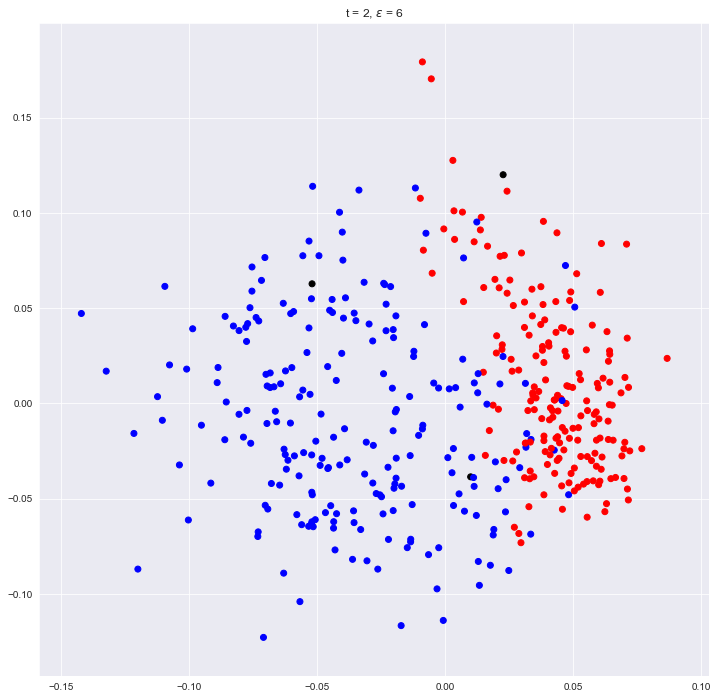

In [14]:
W, V = diffusion_map(key_terms_str, 2, 6)

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sb

fig = plt.figure(figsize=(12,12))
sb.set_style('darkgrid')
plt.axis(scaled=True)
x = V[:,1]; y = V[:,2]
plt.scatter(x, y, c=party_colors)
plt.title('t = 2, $\epsilon$ = 6')

In [9]:
import itertools

power = [1, 3, 5]
eps   = [2, 4, 6]
params = [xs for xs in itertools.product(power, eps)]
print(params)

[(1, 2), (1, 4), (1, 6), (3, 2), (3, 4), (3, 6), (5, 2), (5, 4), (5, 6)]


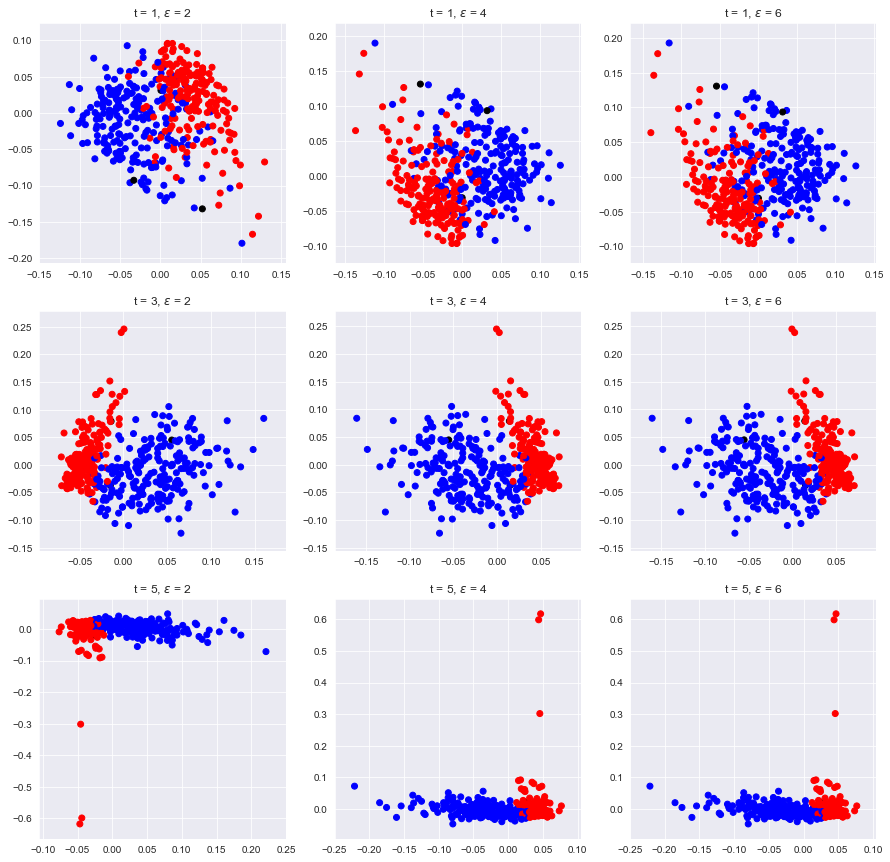

In [12]:
sb.set_style('darkgrid')
fig = plt.figure(figsize=(15,15))

for i, param in enumerate(params):
    power = param[0]
    eps   = param[1]
    W, V = diffusion_map(key_terms_str, power, eps )
    x = V[:,1]; y = V[:,2]
    plt.subplot(3, 3, i+1)
    plt.scatter(x, y, c=party_colors)
    plot_title = ', '.join(['t = ' + str(power), '$\epsilon$ = ' + str(eps)])
    plt.title(plot_title)

plt.show()